### Langgraph with Conditional Edge

In [1]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class AgentState(TypedDict):
    number1: int
    number2: int
    operation: str
    finalNumber: int

In [3]:
def adder(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] + state['number2']
    return state

def subtractor(state: AgentState) -> AgentState:
    state['finalNumber'] = state['number1'] - state['number2']
    return state

def decide_next_node(state: AgentState) -> str:
    if state['operation'] == '+':
        return 'adder_function'
    elif state['operation'] == '-':
        return 'subtractor_function'

In [4]:
graph = StateGraph(AgentState)
graph.add_node("adder", adder)
graph.add_node("subtractor", subtractor)
graph.add_node("router", lambda state: state)
graph.add_edge(START, "router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        'adder_function': 'adder',
        'subtractor_function': 'subtractor'
    }
)
graph.add_edge("adder", END)
graph.add_edge("subtractor", END)
app = graph.compile()

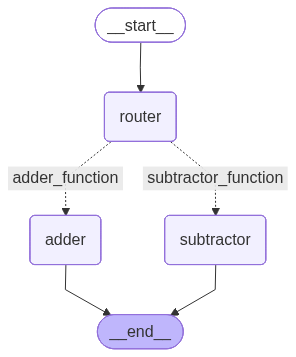

In [5]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [6]:
app.invoke({"number1": 10, "number2": 5, "operation": "+"})

{'number1': 10, 'number2': 5, 'operation': '+', 'finalNumber': 15}